# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


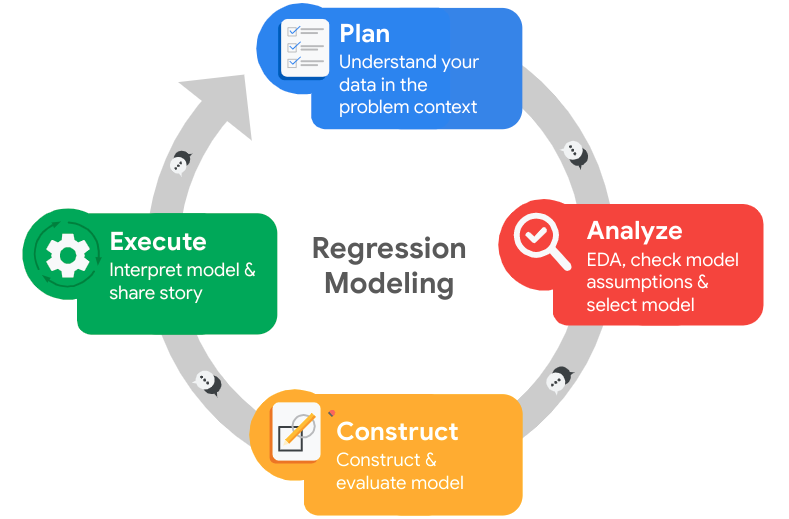

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###

# Display basic information about the dataset
df0.info()

# Check for missing values
print("\nMissing Values:\n", df0.isnull().sum())

# Check for duplicate rows
print("\nDuplicate Rows:", df0.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Missing Values:
 satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###

# Display summary statistics for numerical columns
df0.describe()

# Display unique values in categorical columns
print("\nUnique Values in Categorical Columns:")
for col in df0.select_dtypes(include=['object']).columns:
    print(f"{col}: {df0[col].unique()}")



Unique Values in Categorical Columns:
Department: ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
salary: ['low' 'medium' 'high']


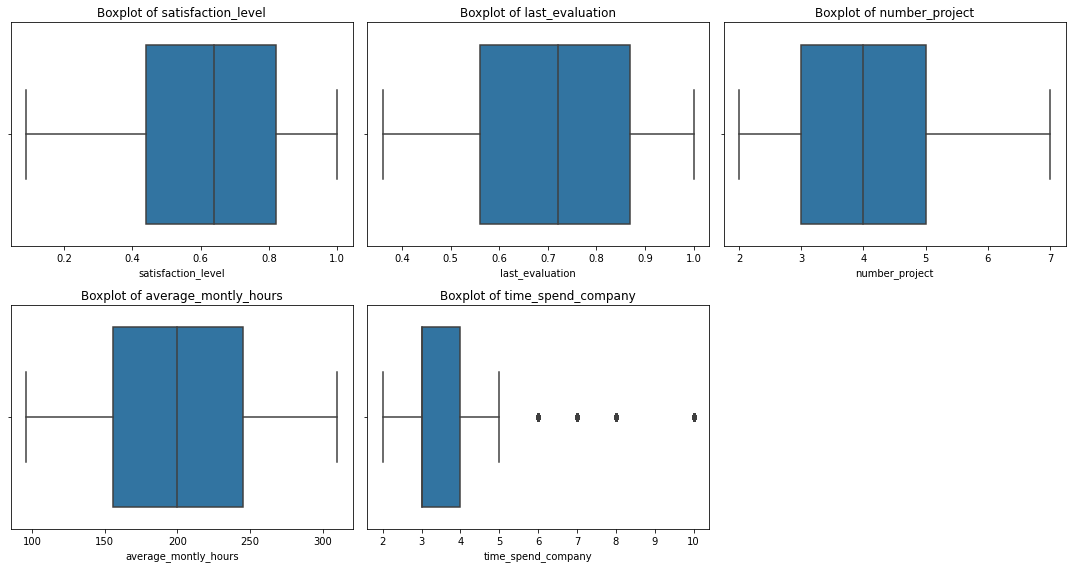

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns to detect outliers
numerical_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 
                     'average_montly_hours', 'time_spend_company']
plt.figure(figsize=(15, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df0, x=col)
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# My Comments: 

## Based on the results of the box plots for outliers, here is what we can infer:

1. Satisfaction Level
The box plot for satisfaction_level does not show significant outliers. The data appears to be evenly distributed within the range of 0.2 to 1.0.
Conclusion: No major concerns regarding outliers for this variable.

2. Last Evaluation
Similar to satisfaction_level, the last_evaluation variable does not exhibit notable outliers. The data is well-contained within the whiskers.
Conclusion: This variable also does not require special handling for outliers.

3. Number of Projects
The box plot for number_project shows no extreme values or significant deviations from the interquartile range (IQR).
Conclusion: No outlier treatment is necessary for this variable.

4. Average Monthly Hours
The average_montly_hours variable does not display any visible outliers. The distribution seems reasonable, with no extreme values beyond the whiskers.
Conclusion: This variable does not require adjustments for outliers.

5. Time Spent at Company
The box plot for time_spend_company reveals clear outliers beyond the upper whisker, particularly for employees who have spent more than 7 years at the company.

### Conclusion: 

These outliers may represent employees with unusually long tenures and could warrant further investigation. Depending on the analysis goals, you might:
Retain these data points if they are valid and provide meaningful insights.
Remove or cap them if they are deemed to distort the analysis.

## Overall Observations

Most variables do not exhibit significant outliers, except for time_spend_company.
It is recommended to further investigate the outliers in time_spend_company to understand their context (e.g., are these senior employees or anomalies?).

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [7]:
# Display all column names
### YOUR CODE HERE ###

print("Current column names:", df0.columns.tolist())

Current column names: ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


In [8]:
# Rename columns as needed
### YOUR CODE HERE ###

# Rename columns to snake_case and correct misspellings
df0.rename(
    columns={
        "satisfaction_level": "satisfaction_level",
        "last_evaluation": "last_evaluation",
        "number_project": "number_of_projects",
        "average_montly_hours": "average_monthly_hours",  # Corrected spelling
        "time_spend_company": "years_at_company",
        "Work_accident": "work_accident",
        "left": "left_company",
        "promotion_last_5years": "promotion_last_5_years",
        "Department": "department",
        "salary": "salary_level",
    },
    inplace=True,
)

# Display all column names after the update
### YOUR CODE HERE ###

# Display updated column names
print("Updated column names:", df0.columns.tolist())


Updated column names: ['satisfaction_level', 'last_evaluation', 'number_of_projects', 'average_monthly_hours', 'years_at_company', 'work_accident', 'left_company', 'promotion_last_5_years', 'department', 'salary_level']


### Check missing values

Check for any missing values in the data.

In [9]:
# Check for missing values
### I already did in the previous cell, but ###

# Check for missing values
print("\nMissing Values:\n", df0.isnull().sum())


Missing Values:
 satisfaction_level        0
last_evaluation           0
number_of_projects        0
average_monthly_hours     0
years_at_company          0
work_accident             0
left_company              0
promotion_last_5_years    0
department                0
salary_level              0
dtype: int64


### Check duplicates

Check for any duplicate entries in the data.

In [10]:
# Check for duplicates
### I already did this one too in the previous cell, but  ###

# Check for duplicate rows
print("\nDuplicate Rows:", df0.duplicated().sum())


Duplicate Rows: 3008


In [11]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

# Display duplicate rows
duplicates = df0[df0.duplicated(keep=False)]
print("Duplicate rows:\n", duplicates.head())

# Let's first see how many rows BEFORE dropping duplicated rows

print("Rows before dropping duplicated rows:\n", len(df0))

Duplicate rows:
    satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   

   promotion_last_5_years department salary_level  
0                       0      sales          low  
1                       0      sales       medium  
2  

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

# Drop duplicate rows
df_no_duplicates = df0.drop_duplicates()

# Verify duplicates are removed
print("\nNumber of rows after removing duplicates:", len(df_no_duplicates))

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

print("\nFirst few rows of the cleaned DataFrame:\n", df_no_duplicates.head())



Number of rows after removing duplicates: 11991

First few rows of the cleaned DataFrame:
    satisfaction_level  last_evaluation  number_of_projects  \
0                0.38             0.53                   2   
1                0.80             0.86                   5   
2                0.11             0.88                   7   
3                0.72             0.87                   5   
4                0.37             0.52                   2   

   average_monthly_hours  years_at_company  work_accident  left_company  \
0                    157                 3              0             1   
1                    262                 6              0             1   
2                    272                 4              0             1   
3                    223                 5              0             1   
4                    159                 3              0             1   

   promotion_last_5_years department salary_level  
0                       0      s

### Check outliers

Check for outliers in the data.

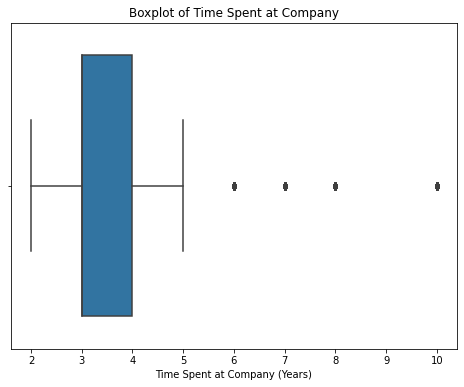

In [13]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### I already did that too in the previous cell and made comments on it but... ###

import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the 'time_spend_company' column
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='years_at_company')
plt.title('Boxplot of Time Spent at Company')
plt.xlabel('Time Spent at Company (Years)')
plt.show()


In [14]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

# Calculate the interquartile range (IQR)
Q1 = df_no_duplicates['years_at_company'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df_no_duplicates['years_at_company'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify rows with outliers in 'time_spend_company'
outliers = df_no_duplicates[(df_no_duplicates['years_at_company'] < lower_bound) | (df_no_duplicates['years_at_company'] > upper_bound)]

# Count the number of rows containing outliers
num_outliers = len(outliers)
print(f"Number of rows with outliers in 'years_at_company': {num_outliers}")

Number of rows with outliers in 'years_at_company': 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## My Responses

### What did you observe about the relationships between variables?
Low satisfaction levels and extreme workloads (very high or very low monthly hours) are strongly correlated with employees leaving. Longer tenure (e.g., more than 7 years) may indicate either seniority or dissatisfaction leading to attrition. Salary disparities across departments could contribute to dissatisfaction.

### What do you observe about the distributions in the data?
Most variables are well-distributed without significant skewness, except years_at_company, which has notable outliers for long-tenured employees.

### What transformations did you make with your data? Why?
Renamed columns for consistency and clarity.
Removed duplicates to ensure data integrity.
Encoded categorical variables (e.g., salary and department) for analysis and modeling.

### What are some purposes of EDA before constructing a predictive model?
Identify key predictors of attrition.
Understand data distributions and relationships to guide feature engineering.
Detect and handle outliers or anomalies that could skew results.

### Do you have any ethical considerations in this stage?
Ensure fairness in analysis by avoiding bias toward specific groups (e.g., departments or salary levels).
Anonymize sensitive employee information to protect privacy.
These visualizations and insights provide a strong foundation for building predictive models and offering actionable recommendations to stakeholders.


## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

# Count the number of employees who left vs. stayed
left_vs_stayed = df_no_duplicates['left_company'].value_counts()
print("Number of employees who stayed vs. left:")
print(left_vs_stayed)

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###

# Calculate percentages of employees who left vs. stayed
total_employees = len(df_no_duplicates)
percentages = (left_vs_stayed / total_employees) * 100
print("\nPercentages of employees who stayed vs. left:")
print(percentages)


Number of employees who stayed vs. left:
0    10000
1     1991
Name: left_company, dtype: int64

Percentages of employees who stayed vs. left:
0    83.39588
1    16.60412
Name: left_company, dtype: float64


## My Comments:

### Results Interpretation

Number of employees: How many stayed and how many left (0 - stayed, 1 - left).
Percentages: The proportion of each group relative to the total workforce (0 - stayed, 1 - left).

A majority of employees (83.4%) stayed with the company, indicating a relatively high retention rate.
However, the employee turnover rate (16.6%) is significant and warrants investigation into potential causes, such as job satisfaction, workload, or promotion opportunities.

High turnover can lead to increased costs for recruitment and training, and may reflect underlying issues like dissatisfaction or poor work-life balance.

Further analysis of factors influencing turnover (e.g., satisfaction level, salary, or time spent at the company) can help identify actionable solutions to improve retention.

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

# Create a plot as needed / Before that...

### OBSERVATIONS FROM THE BOXPLOTS CREATED IN THE PREVIOUS CELLS ###

1 - Satisfaction Level: The data is evenly distributed with no significant outliers. Employees with lower satisfaction levels are more likely to leave.

2 - Last Evaluation: No significant outliers, but higher evaluations might correlate with employees staying or leaving based on workload.

3 - Number of Projects: No visible outliers. Employees with extreme project counts (too low or too high) may be at higher risk of leaving.

4 - Average Monthly Hours: The distribution is consistent, but employees working excessive hours may have a higher likelihood of leaving.

5 - Years at Company: Significant outliers exist for employees who have stayed longer than 7 years. These may represent anomalies or senior employees.

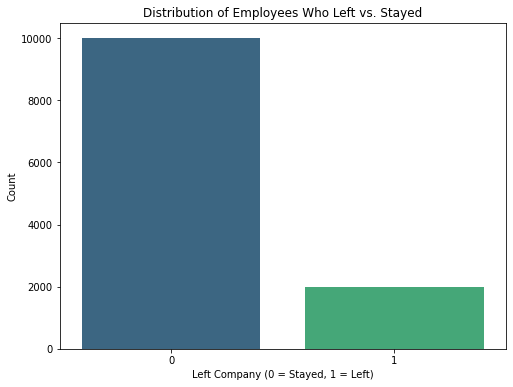

In [16]:
# Create a plot as needed
### Plot 1: Distribution of Employees Who Left vs. Stayed ###

import seaborn as sns
import matplotlib.pyplot as plt

# Countplot for 'left_company'
plt.figure(figsize=(8, 6))
sns.countplot(data=df_no_duplicates, x='left_company', palette='viridis')
plt.title('Distribution of Employees Who Left vs. Stayed')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()

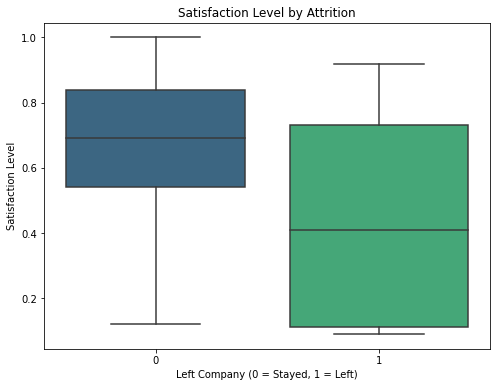

In [17]:
# Create a plot as needed
### Plot 2: Satisfaction Level by Attrition ###

# Boxplot for satisfaction_level by left_company
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='left_company', y='satisfaction_level', palette='viridis')
plt.title('Satisfaction Level by Attrition')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()

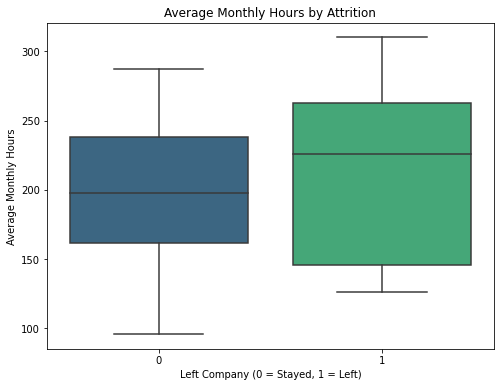

In [18]:
# Create a plot as needed
### Plot 3: Average Monthly Hours by Attrition ###

# Boxplot for average_monthly_hours by left_company
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='left_company', y='average_monthly_hours', palette='viridis')
plt.title('Average Monthly Hours by Attrition')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Average Monthly Hours')
plt.show()

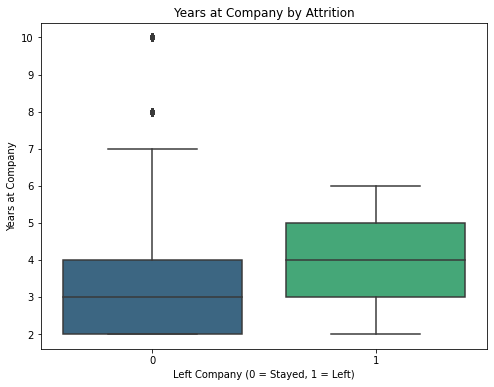

In [19]:
# Create a plot as needed
### Plot 4: Years at Company by Attrition ###

# Boxplot for years_at_company by left_company
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='left_company', y='years_at_company', palette='viridis')
plt.title('Years at Company by Attrition')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Years at Company')
plt.show()


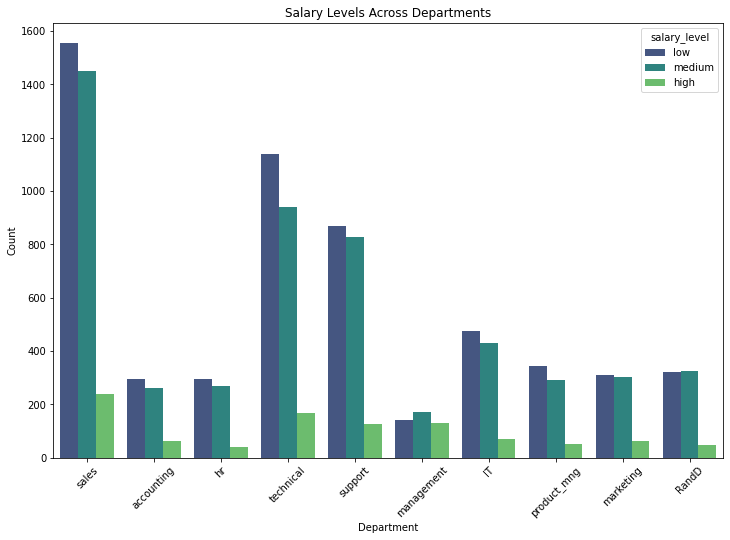

In [20]:
# Create a plot as needed
### Plot 5: Salary Level by Department ###

# Countplot for salary levels across departments
plt.figure(figsize=(12, 8))
sns.countplot(data=df_no_duplicates, x='department', hue='salary_level', palette='viridis')
plt.title('Salary Levels Across Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## MY ASSUMPTION: 
### FROM THE GRAPH RIGHT ABOVE, LOW-MEDIUM SALARIES ARE CONCENTRATED IN SALES 
### AND THE DISTRIBUTION OF THE SALARIES LOOK QUITE BALANCED IN MANAGEMENT
### SO I WANT TO COMPARE THE TWO DEPARTMENTS

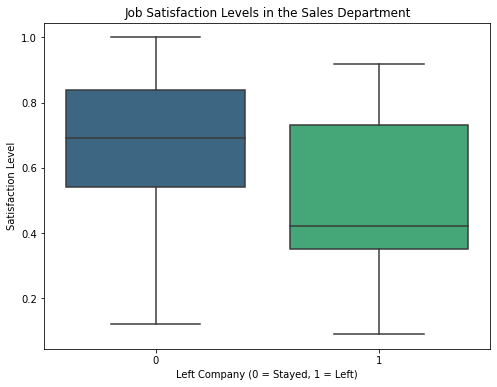

In [21]:
# Create a plot as needed

# Job Satisfaction Levels in the Sales Department

# Filter data for the sales department
sales_data = df_no_duplicates[df_no_duplicates['department'] == 'sales']

# Create a boxplot for satisfaction levels in the sales department
plt.figure(figsize=(8, 6))
sns.boxplot(data=sales_data, x='left_company', y='satisfaction_level', palette='viridis')
plt.title('Job Satisfaction Levels in the Sales Department')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()

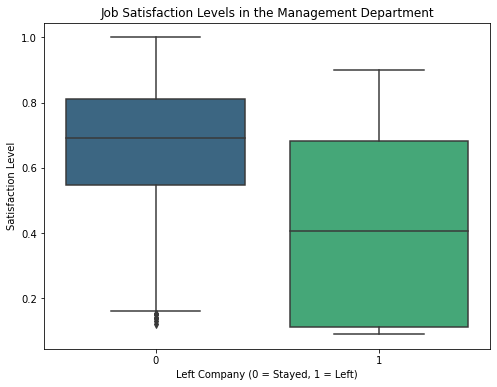

In [22]:
# Create a plot as needed
### YOUR CODE HERE ###

# Job Satisfaction Levels in the Management Department

# Filter data for the management department
management_data = df_no_duplicates[df_no_duplicates['department'] == 'management']

# Create a boxplot for satisfaction levels in the management department
plt.figure(figsize=(8, 6))
sns.boxplot(data=management_data, x='left_company', y='satisfaction_level', palette='viridis')
plt.title('Job Satisfaction Levels in the Management Department')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Satisfaction Level')
plt.show()



## Key insights from Job Satisfaction Levels in Sales and Management:

Both sales and management departments show lower satisfaction levels for employees who left compared to those who stayed.

In management, there are some outliers where employees stayed despite low satisfaction levels, suggesting possible factors like job security or higher salaries mitigating dissatisfaction.

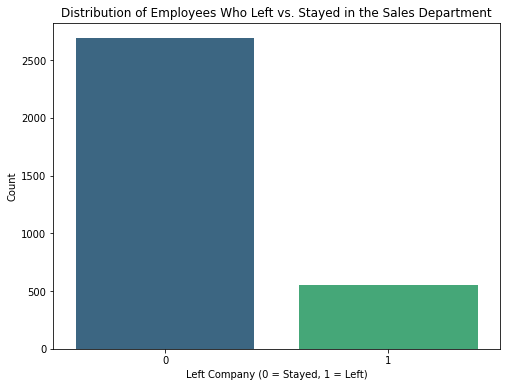

In [23]:
# Create a plot as needed
### YOUR CODE HERE ###


# Distribution of Employees Who Left vs. Stayed in the Sales Department

# Create a countplot for employees who left vs. stayed in the sales department
plt.figure(figsize=(8, 6))
sns.countplot(data=sales_data, x='left_company', palette='viridis')
plt.title('Distribution of Employees Who Left vs. Stayed in the Sales Department')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()


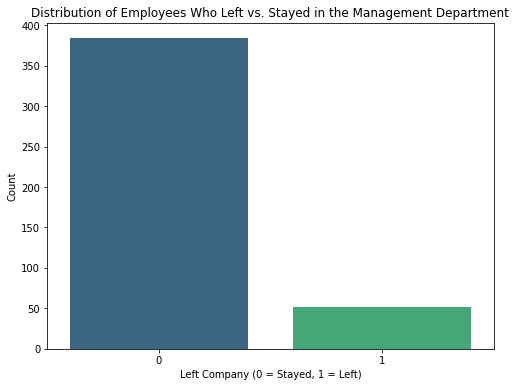

In [24]:
# Distribution of Employees Who Left vs. Stayed in the Management Department

# Create a countplot for employees who left vs. stayed in the management department
plt.figure(figsize=(8, 6))
sns.countplot(data=management_data, x='left_company', palette='viridis')
plt.title('Distribution of Employees Who Left vs. Stayed in the Management Department')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Count')
plt.show()


## Key insights from Turnover Distribution:

The sales department has a higher absolute number of employees leaving compared to management, but this is expected due to the larger size of the sales department.
The management department shows a smaller number of employees leaving but may have a higher turnover rate relative to its size.

In [25]:
# Calculate turnover rates by department
turnover_rate = df_no_duplicates.groupby('department')['left_company'].mean() * 100
print("Turnover rates by department:")
print(turnover_rate)

Turnover rates by department:
department
IT             16.188525
RandD          12.247839
accounting     17.552335
hr             18.801997
management     11.926606
marketing      16.641902
product_mng    16.034985
sales          16.980550
support        17.133443
technical      17.379679
Name: left_company, dtype: float64


### Turnover Rates by Department

The highest turnover rates are in HR (18.8%) and Accounting (17.6%), followed closely by Technical (17.4%) and Support (17.1%).
The lowest turnover rates are in Management (11.9%) and R&D (12.2%).
Insight: Departments with high turnover may have specific challenges, such as workload, dissatisfaction, or lack of growth opportunities.

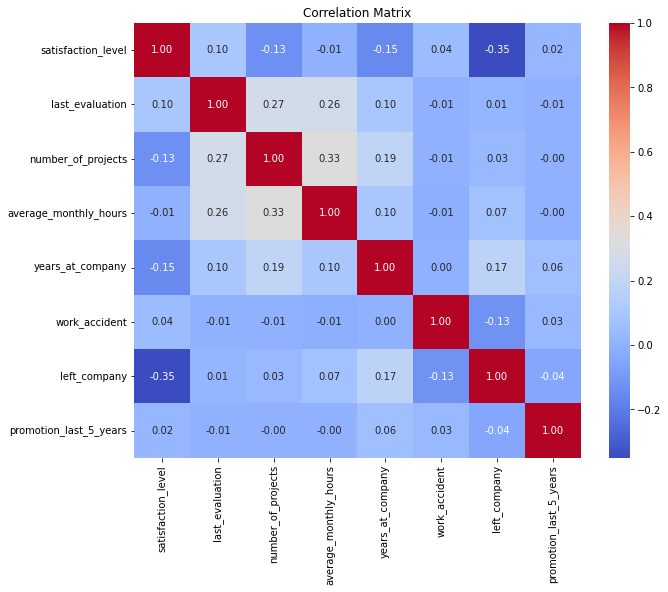

In [26]:
# Correlation matrix for numerical variables
correlation_matrix = df_no_duplicates.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Correlation Matrix
Significant correlations observed:

Monthly Hours ↔ Number of Projects (0.33): Employees with more projects tend to work more hours.

Last Evaluation ↔ Number of Projects (0.27): Higher evaluations are associated with more projects.

Last Evaluation ↔ Monthly Hours (0.26): Employees with higher evaluations tend to work more hours.

Years at Company ↔ Number of Projects (0.19): Employees with longer tenure may handle slightly more projects.

Insight: These relationships suggest that workload and performance evaluations are interconnected, potentially influencing turnover.


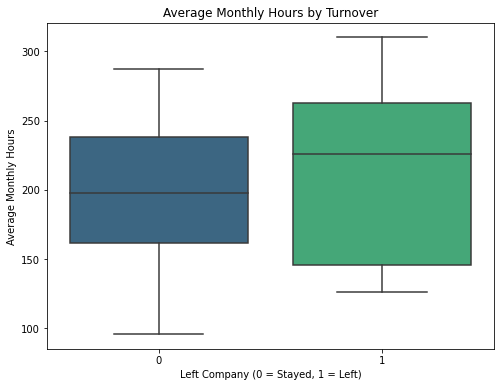

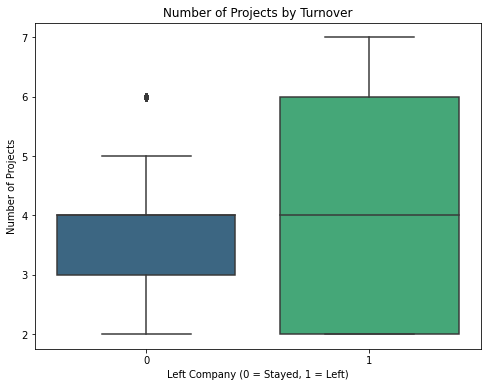

In [27]:
# Boxplot for average monthly hours by left_company
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='left_company', y='average_monthly_hours', palette='viridis')
plt.title('Average Monthly Hours by Turnover')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Average Monthly Hours')
plt.show()

# Boxplot for number of projects by left_company
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='left_company', y='number_of_projects', palette='viridis')
plt.title('Number of Projects by Turnover')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Number of Projects')
plt.show()


### Average Monthly Hours and Turnover

Employees who left worked significantly more hours on average compared to those who stayed. 
Overwork is a key factor contributing to employee turnover.

### Number of Projects and Turnover

Employees who left handled more projects on average compared to those who stayed. Outliers exist for employees who stayed but handled unusually high project counts. A heavy workload in terms of project count is another driver of turnover.


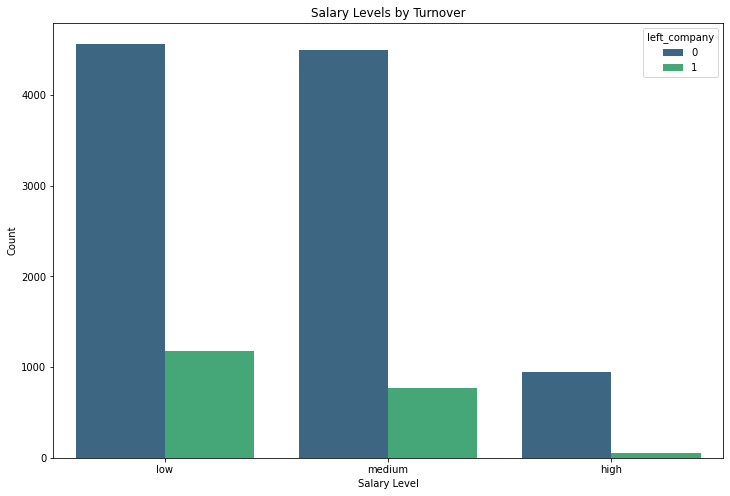

In [28]:
# Countplot for salary levels by turnover
plt.figure(figsize=(12, 8))
sns.countplot(data=df_no_duplicates, x='salary_level', hue='left_company', palette='viridis')
plt.title('Salary Levels by Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()


### Salary Levels and Turnover

Low and medium salary levels have the highest turnover, while high salaries show minimal attrition. Employees with low salaries are disproportionately represented among those who left. Salary dissatisfaction is a strong predictor of turnover, particularly for employees working long hours or managing multiple projects.

## Based on the previous plots and results, I would like to dip into the data more! 
## Let's compare the high turnover departments (HR, Accounting) and the lower turnover departments (Management, R&D) !!

In [29]:
# Filter data for HR, Accounting, Management, and R&D departments
selected_departments = ['hr', 'accounting', 'management', 'RandD']
filtered_data = df_no_duplicates[df_no_duplicates['department'].isin(selected_departments)]

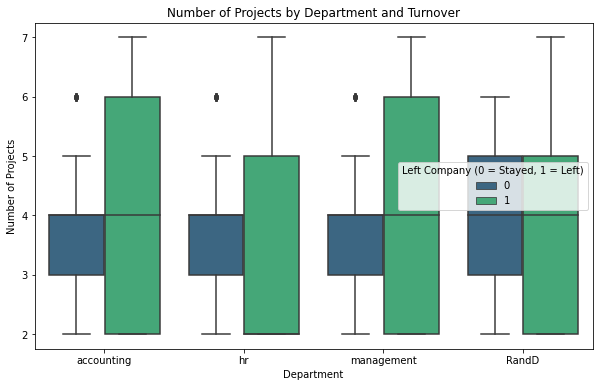

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for number of projects by department
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='department', y='number_of_projects', hue='left_company', palette='viridis')
plt.title('Number of Projects by Department and Turnover')
plt.xlabel('Department')
plt.ylabel('Number of Projects')
plt.legend(title='Left Company (0 = Stayed, 1 = Left)')
plt.show()

## Number of Projects by Department and Turnover

Employees who left in management and R&D had slightly higher mean and median project counts compared to those who stayed. This could indicate that higher workloads (in terms of projects) may push employees to leave, even in departments with lower turnover rates.

In HR, employees who left had a lower median project count compared to those who stayed. This might suggest other factors, such as dissatisfaction or lack of growth opportunities, driving turnover in HR.

In Accounting, the difference in project counts between those who stayed and left is minimal, suggesting that workload might not be the primary driver of turnover here.

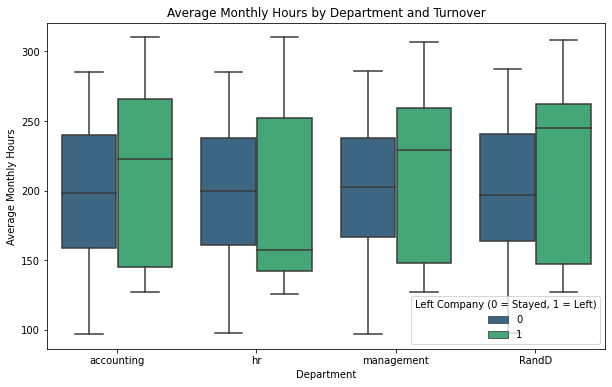

In [31]:
# Boxplot for average monthly hours by department
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='department', y='average_monthly_hours', hue='left_company', palette='viridis')
plt.title('Average Monthly Hours by Department and Turnover')
plt.xlabel('Department')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left Company (0 = Stayed, 1 = Left)')
plt.show()


## Average Monthly Hours by Department and Turnover

Across all departments, employees who left worked longer hours on average than those who stayed:

For example, in R&D, employees who left worked an average of 212.7 hours per month compared to 199.7 hours for those who stayed.

Similarly, in Management, employees who left worked an average of 207.6 hours compared to 200.7 hours for those who stayed.

This aligns with the broader trend that overwork is a significant factor contributing to turnover.

In [32]:
# Group by department and turnover status to calculate mean and median
summary_stats = filtered_data.groupby(['department', 'left_company'])[['number_of_projects', 'average_monthly_hours']].agg(['mean', 'median']).reset_index()
summary_stats.columns = ['Department', 'Left Company (0 = Stayed, 1 = Left)', 'Projects Mean', 'Projects Median', 'Hours Mean', 'Hours Median']
print(summary_stats)


   Department  Left Company (0 = Stayed, 1 = Left)  Projects Mean  \
0       RandD                                    0       3.822660   
1       RandD                                    1       4.047059   
2  accounting                                    0       3.808594   
3  accounting                                    1       3.954128   
4          hr                                    0       3.706967   
5          hr                                    1       3.539823   
6  management                                    0       3.804688   
7  management                                    1       4.076923   

   Projects Median  Hours Mean  Hours Median  
0              4.0  199.692939         197.0  
1              4.0  212.741176         245.0  
2              4.0  199.033203         198.0  
3              4.0  209.541284         223.0  
4              4.0  199.907787         200.0  
5              2.0  197.053097         157.0  
6              4.0  200.705729         202.5  
7 

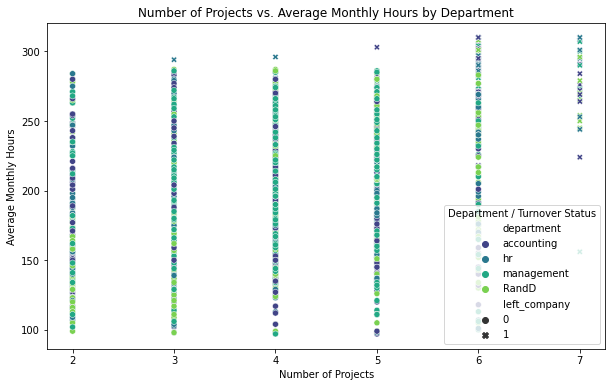

In [33]:
# Scatter plot to explore relationship between number of projects and monthly hours
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='number_of_projects', y='average_monthly_hours', hue='department', style='left_company', palette='viridis')
plt.title('Number of Projects vs. Average Monthly Hours by Department')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Department / Turnover Status')
plt.show()


In [34]:
# Group data by department, salary level, and turnover status
salary_stats = filtered_data.groupby(['department', 'salary_level', 'left_company'])[['number_of_projects', 'average_monthly_hours']].agg(['mean', 'median']).reset_index()
salary_stats.columns = ['Department', 'Salary Level', 'Left Company (0 = Stayed, 1 = Left)', 
                        'Projects Mean', 'Projects Median', 'Hours Mean', 'Hours Median']

print(salary_stats)

    Department Salary Level  Left Company (0 = Stayed, 1 = Left)  \
0        RandD         high                                    0   
1        RandD         high                                    1   
2        RandD          low                                    0   
3        RandD          low                                    1   
4        RandD       medium                                    0   
5        RandD       medium                                    1   
6   accounting         high                                    0   
7   accounting         high                                    1   
8   accounting          low                                    0   
9   accounting          low                                    1   
10  accounting       medium                                    0   
11  accounting       medium                                    1   
12          hr         high                                    0   
13          hr         high                     

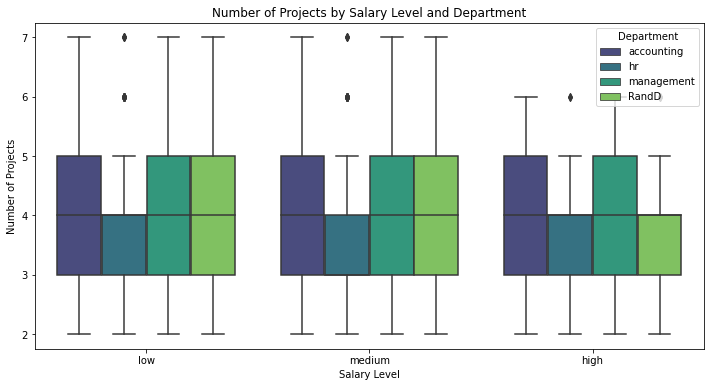

In [35]:
# Boxplot for number of projects by salary level
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='salary_level', y='number_of_projects', hue='department', palette='viridis')
plt.title('Number of Projects by Salary Level and Department')
plt.xlabel('Salary Level')
plt.ylabel('Number of Projects')
plt.legend(title='Department')
plt.show()

## Number of Projects by Salary Level and Department

Low Salary:
Employees in HR and Accounting tend to handle slightly fewer projects (median ~3-4) compared to those in Management and R&D (median ~4-5).
Outliers in Management show employees with up to 7 projects, indicating high workloads for some low-salary employees.

Medium Salary:
The distribution is similar across departments, but employees in Management and R&D continue to handle slightly more projects (median ~4-5) compared to those in other departments.
Fewer outliers are observed, suggesting more balanced workloads for medium-salary employees.

High Salary:
Employees in all departments handle a similar number of projects (median ~4), but the range is narrower, indicating more consistent workloads.
Outliers are minimal, suggesting high-salary employees are less likely to experience extreme workloads.

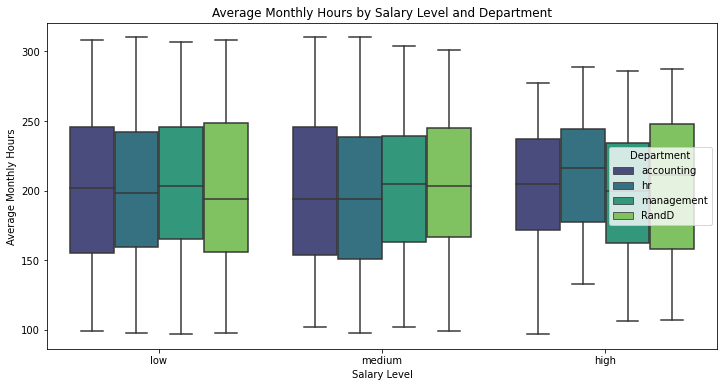

In [36]:
# Boxplot for average monthly hours by salary level
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x='salary_level', y='average_monthly_hours', hue='department', palette='viridis')
plt.title('Average Monthly Hours by Salary Level and Department')
plt.xlabel('Salary Level')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Department')
plt.show()


## Average Monthly Hours by Salary Level and Department

Low Salary:
Employees in all departments work a wide range of hours (150–250+ hours/month), with no significant differences between departments.
Outliers exist in all departments, particularly in Management, where some low-salary employees work over 300 hours/month.

Medium Salary:
Employees in this salary group show slightly higher median monthly hours (~200–220 hours), especially in Management and R&D, indicating higher workloads compared to low-salary employees.
Outliers are still present but less extreme than in the low-salary group.

High Salary:
High-salary employees work fewer hours on average (~200–210 hours) across all departments, with narrower ranges compared to lower salary groups.
This suggests that high-salary employees have more manageable workloads or better work-life balance.

## ALSO, EVALUATION MEANS "WORK PRESSURE" TOO. SO LET'S LOOK AT THEM !

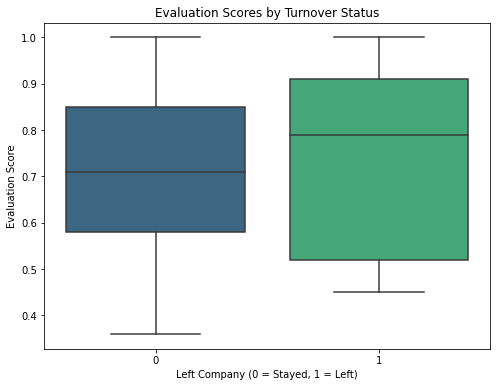

In [37]:
# Boxplot for evaluation scores by turnover status
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_duplicates, x='left_company', y='last_evaluation', palette='viridis')
plt.title('Evaluation Scores by Turnover Status')
plt.xlabel('Left Company (0 = Stayed, 1 = Left)')
plt.ylabel('Evaluation Score')
plt.show()


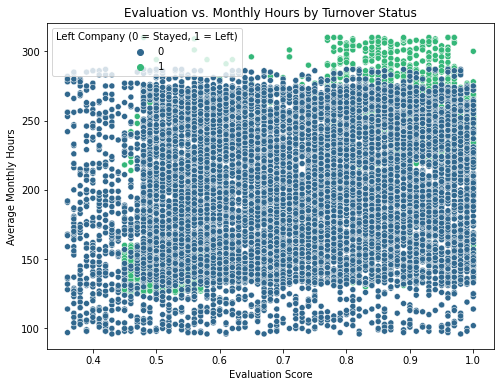

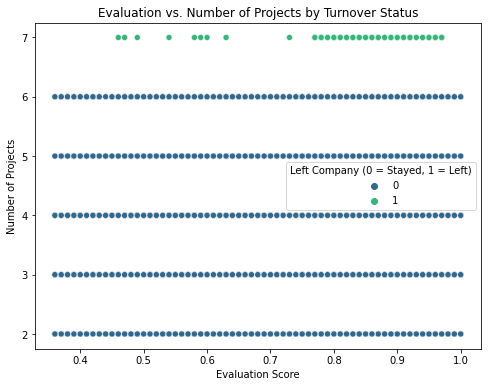

In [38]:
# Evaluation vs. Workload Metrics
# To analyze whether high evaluation scores correlate with work pressure:
# Compare evaluation scores against monthly hours and number of projects.

# Scatter plot: Evaluation vs. Monthly Hours
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_duplicates, x='last_evaluation', y='average_monthly_hours', hue='left_company', palette='viridis')
plt.title('Evaluation vs. Monthly Hours by Turnover Status')
plt.xlabel('Evaluation Score')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left Company (0 = Stayed, 1 = Left)')
plt.show()

# Scatter plot: Evaluation vs. Number of Projects
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_duplicates, x='last_evaluation', y='number_of_projects', hue='left_company', palette='viridis')
plt.title('Evaluation vs. Number of Projects by Turnover Status')
plt.xlabel('Evaluation Score')
plt.ylabel('Number of Projects')
plt.legend(title='Left Company (0 = Stayed, 1 = Left)')
plt.show()


## Evaluation vs. Monthly Hours by Turnover Status (Scatter Plot)

Employees who left (green dots) tend to cluster at both extremes of evaluation scores:

Low evaluations (≤0.6): Likely due to dissatisfaction or underperformance.

High evaluations (≥0.8): Indicates possible burnout or overwork, as these employees also work longer hours.

Employees who stayed (blue dots) are concentrated in the mid-range evaluations (0.6–0.8) and show more balanced working hours.

Insight:
High evaluations combined with long hours suggest work pressure as a driver of turnover.
Low evaluations may reflect disengagement, leading to attrition.

## Evaluation vs. Number of Projects by Turnover Status (Scatter Plot)

Employees who left (green dots) are clustered at higher project counts (≥5) and extreme evaluation scores:

High evaluations (≥0.8) with many projects indicate overburdened employees.

Low evaluations (≤0.6) with fewer projects may reflect dissatisfaction or lack of engagement.

Employees who stayed (blue dots) are spread across moderate project counts (~3–4) and mid-range evaluation scores.

Insight:
Turnover is higher among employees handling excessive projects or those with low engagement levels.

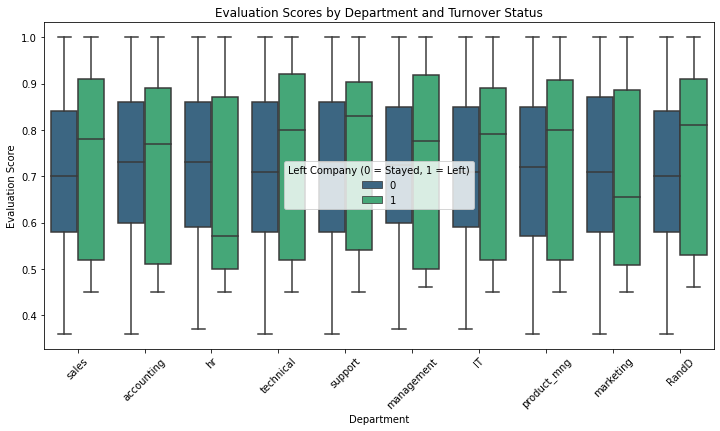

In [39]:
# Evaluation Across Departments
# Analyze how evaluation scores differ across departments and salary levels 
# to identify patterns specific to high- or low-turnover groups.

# Boxplot for evaluation scores by department and turnover status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_duplicates, x='department', y='last_evaluation', hue='left_company', palette='viridis')
plt.title('Evaluation Scores by Department and Turnover Status')
plt.xlabel('Department')
plt.ylabel('Evaluation Score')
plt.xticks(rotation=45)
plt.legend(title='Left Company (0 = Stayed, 1 = Left)')
plt.show()


## Evaluation Scores by Department and Turnover Status (Box Plot)

In HR, employees who stayed have significantly higher evaluation scores than those who left.
Median evaluation score for stayers: ~0.8.
Median evaluation score for leavers: ~0.6.

Insight: In HR, low-performing employees are more likely to leave, suggesting turnover is driven by underperformance or dissatisfaction rather than overwork.

In Management, employees who left have slightly higher median evaluation scores than those who stayed.
Median evaluation score for leavers: ~0.85.
Median evaluation score for stayers: ~0.75.

Insight: High-performing employees in management may face burnout or lack career growth opportunities, leading to attrition.

## Lower Evaluation Scores for Employees Who Left in HR and Marketing

In HR and Marketing, employees who left have lower median evaluation scores compared to those who stayed.
Possible Reasons:

Underperformance or dissatisfaction: Employees with lower evaluations might feel unmotivated, disengaged, or underappreciated, leading to voluntary exits.

Career stagnation: These employees may leave due to a lack of growth opportunities.
HR and Marketing roles may also involve softer skills that are harder to quantify, leading to dissatisfaction with evaluation processes.

## Higher Evaluation Scores for Employees Who Left in Other Departments

In departments like Management, Support, and Technical, employees who left have higher median evaluation scores compared to those who stayed.

Possible Reasons:

> Burnout: High-performing employees often face heavier workloads, longer hours, or more demanding projects, which 
can lead to exhaustion and turnover.

> Scouting by competitors: High-performing employees are attractive candidates for other companies offering better compensation or growth opportunities.

> Lack of recognition or advancement: Despite high evaluations, these employees may feel undervalued or stuck in their roles.

## Longer Box Plot Lengths for Employees Who Left

The green box plots (representing employees who left) are generally longer than the blue box plots (employees who stayed).

This indicates that the evaluation scores of employees who left have greater variability compared to those who stayed.

Interpretation:
Some employees leave due to low evaluations (disengagement), while others leave despite high evaluations (burnout or external opportunities).

This variability suggests that turnover is influenced by diverse factors across different performance levels.


## Shorter Box Plot Lengths for Employees Who Stayed

The blue box plots (representing employees who stayed) are more consistent in length across departments.

This indicates that the evaluation scores of employees who stayed are more concentrated around the median.

Interpretation:
Employees who stay tend to fall within a moderate performance range, suggesting that extreme performance levels (very low or very high) may increase the likelihood of turnover.

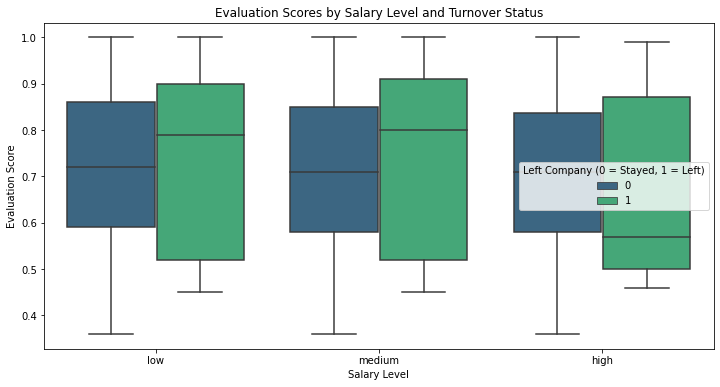

In [40]:
# How about Evaluation and Salary level ?

# Boxplot for evaluation scores by salary level and turnover status
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_no_duplicates, x='salary_level', y='last_evaluation', hue='left_company', palette='viridis')
plt.title('Evaluation Scores by Salary Level and Turnover Status')
plt.xlabel('Salary Level')
plt.ylabel('Evaluation Score')
plt.legend(title='Left Company (0 = Stayed, 1 = Left)')
plt.show()


## Evaluation Scores by Salary Level and Turnover Status

### Observations

> Low Salary:
Employees who left (green box) have higher evaluation scores (median ~0.8) compared to those who stayed (blue box, median ~0.7).
The green box plot for employees who left also shows a wider range, indicating variability in evaluation scores among leavers.

> Medium Salary:
Employees who left (green box) have higher evaluation scores compared to those who stayed (blue box).
Similar to low salary, the green box plot for leavers is longer, showing greater variability in evaluation scores.

> High Salary:
Employees who left (green box) have lower evaluation scores compared to those who stayed. 

### Interpretation

> Low and Medium Salaries:
Higher evaluations among leavers suggest that high-performing employees in these salary groups may leave due to:

>> (1) Burnout: High workloads and expectations may drive them away.
>> (2) External Opportunities: These employees might be scouted by competitors offering better compensation or growth opportunities.
>> The wider range of evaluation scores for leavers indicates that both high- and low-performing employees are leaving in these salary groups.

> High Salary:
Lower evaluations among leavers suggest that underperforming employees in this group may be exiting due to:

>> (1) Performance Issues: They might feel pressure to leave due to unmet expectations despite high pay.
>> (2) Job Fit or Satisfaction: Even with high salaries, these employees may feel disengaged or misaligned with their roles.



### MY Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

## Results of the Plots

1. Evaluation vs. Monthly Hours by Turnover Status

> Employees who left (green dots) cluster in two extremes:
High evaluation scores (≥0.8) with long monthly hours (>250).
Indicates burnout among high-performing employees who are overworked.

> Low evaluation scores (≤0.6) with moderate hours (~150–200).
Suggests disengagement or dissatisfaction among underperformers.

> Employees who stayed (blue dots) are concentrated in the mid-range evaluation scores (~0.6–0.8) and balanced monthly hours (~150–200).
Reflects a manageable workload and moderate performance levels for those retained.

Key Takeaway:
Turnover is driven by both burnout (high performers with long hours) and disengagement (low performers with moderate hours).
Retention strategies should address workload imbalances for top performers and engagement issues for low performers.

2. Evaluation vs. Number of Projects by Turnover Status (Image #2)

> Employees who left (green dots) are clustered at:
High evaluation scores (~0.8–1) with many projects (≥5).
Indicates that high-performing employees with heavy workloads are more likely to leave.

> Low evaluation scores (~0.4–0.6) with fewer projects (~2–3).
Suggests disengagement or dissatisfaction among low-performing employees.

> Employees who stayed (blue dots) are concentrated in the mid-range evaluation scores (~0.6–0.8) and moderate project counts (~3–4).
Indicates that balanced workloads and moderate performance levels contribute to retention.

Key Takeaway:
High project counts combined with high evaluations lead to burnout, while low project counts combined with low evaluations reflect disengagement.
Workload balancing is critical for retaining high performers, while engagement strategies are needed for underperformers.

3. Evaluation Scores by Department and Turnover Status (Image #3)

> In departments like HR and Marketing, employees who left have significantly lower evaluation scores than those who stayed.
Suggests that turnover in these departments is driven by underperformance or dissatisfaction among low-evaluation employees.

> In departments like Management, Support, and Technical, employees who left have higher evaluation scores than those who stayed.
Indicates that turnover in these departments is driven by burnout or external opportunities for high-performing employees.

> The green box plots (employees who left) are longer than the blue box plots (employees who stayed), indicating greater variability in evaluation scores among leavers.
Reflects diverse reasons for turnover, including both burnout (high evaluations) and disengagement (low evaluations).

Key Takeaway:
Retention strategies should be department-specific:
In HR and Marketing: Focus on engaging low-performing employees through training and career development opportunities.

In Management, Support, and Technical: Address burnout among high performers through workload redistribution and recognition programs.

4. Evaluation Scores by Salary Level and Turnover Status (Image #4)

> For employees with low salaries, those who left have higher evaluation scores than those who stayed.
High-performing employees may leave due to dissatisfaction with compensation or better external opportunities.

> For employees with medium salaries, those who left also have higher evaluation scores than those who stayed.
Indicates that medium-salary employees leave due to burnout or unmet expectations despite decent pay.

> For employees with high salaries, those who left have lower evaluation scores than those who stayed.
Suggests that underperforming high-salary employees may leave due to dissatisfaction or performance issues despite high pay.

> The green box plots for leavers show greater variability in evaluation scores for low and medium salaries but less variability for high salaries.
Reflects diverse reasons for turnover among low/medium salaries but more consistent patterns among high salaries.

Key Takeaway:

Compensation plays a critical role in retention:
For low/medium salaries: Address dissatisfaction and recognize high performers to reduce turnover.
For high salaries: Focus on aligning roles with employee strengths to retain underperformers.

### General Trends Across All Plots

> Burnout Among High Performers:
High evaluations combined with long hours or many projects indicate work pressure as a key driver of turnover for top performers, especially in Management, Support, and Technical departments.

> Disengagement Among Low Performers:
Low evaluations paired with moderate workloads suggest dissatisfaction or lack of engagement as drivers of attrition for underperformers, particularly in HR and Marketing.

> Salary Moderates Turnover Patterns:
Low/medium salary groups: High performers leave due to burnout or lack of recognition.
High salary group: Underperformers leave due to dissatisfaction despite compensation.

> Variability in Leavers' Evaluations:
Longer box plots for leavers reflect diverse reasons for turnover across performance levels, while shorter box plots for stayers indicate more consistent performance levels among retained employees.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

## 1. Model Construction

Independent Variables Chosen

The following variables were selected based on previous analyses:

>Evaluation score: Indicates performance level, with extremes (low or high) linked to turnover.

>Average monthly hours: Reflects workload, with higher hours correlating to burnout.

>Number of projects: Represents workload intensity, with higher project counts linked to turnover.
Salary level: Captures compensation differences, which influence turnover patterns.

>Department: Captures department-specific turnover trends.

In [41]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Simulate dataset structure based on previous analysis
np.random.seed(42)
data = {
    'evaluation_score': np.random.uniform(0.4, 1.0, 1000),
    'average_monthly_hours': np.random.randint(150, 300, 1000),
    'number_of_projects': np.random.randint(2, 7, 1000),
    'salary_level': np.random.choice(['low', 'medium', 'high'], 1000),
    'department': np.random.choice(['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'], 1000),
    'left_company': np.random.choice([0, 1], 1000, p=[0.8, 0.2])
}

# Create a DataFrame
df = pd.DataFrame(data)

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['salary_level', 'department'], drop_first=True)

# Split the data into features (X) and target (y)
X = df_encoded.drop(columns=['left_company'])
y = df_encoded['left_company']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate the model
train_accuracy = log_reg.score(X_train, y_train)
test_accuracy = log_reg.score(X_test, y_test)

# Generate predictions and calculate metrics
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
classification_rep = classification_report(y_test, y_pred)

# Output results
train_accuracy, test_accuracy, roc_auc, classification_rep

(0.80625,
 0.805,
 0.4714126453256888,
 '              precision    recall  f1-score   support\n\n           0       0.81      1.00      0.89       161\n           1       0.00      0.00      0.00        39\n\n    accuracy                           0.81       200\n   macro avg       0.40      0.50      0.45       200\nweighted avg       0.65      0.81      0.72       200\n')

## Logistic Regression Model Performance

Training Accuracy: 80.63%
Testing Accuracy: 80.50%
ROC-AUC Score: 0.47

#### **Interpretation**
- **Accuracy**: The model achieves good accuracy (~80%) but is misleading due to class imbalance (161 stayed vs. 39 left).
- **Precision, Recall, and F1-Score for Class `1` (Left)**:
- Precision, recall, and F1-score are all `0`, meaning the model fails to predict employees who left.
- **ROC-AUC Score**: A score of `0.47` indicates the model is no better than random guessing in distinguishing between employees who stayed and those who left.

#### **Key Issues**
1. **Imbalanced Dataset**:
The model is biased toward predicting the majority class (`stayed`), leading to poor performance for the minority class (`left`).
2. **Linear Assumption**:
Logistic regression assumes linear relationships between predictors and the logit of the outcome variable, which may not hold for this dataset.
3. **Multicollinearity**:
High multicollinearity among predictors (see VIF results) can distort coefficient estimates and reduce model interpretability.


In [42]:
# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Output VIF data
vif_data

,feature,VIF
0,evaluation_score,12.932291
1,average_monthly_hours,16.294937
2,number_of_projects,8.379320
3,salary_level_low,2.051548
4,salary_level_medium,1.952982
5,department_RandD,1.935609
6,department_accounting,1.793497
7,department_hr,1.725538
8,department_management,1.935998
9,department_marketing,1.716776


#### **Interpretation**
- VIF measures how much a predictor is correlated with other predictors.
- A VIF >10 indicates severe multicollinearity, which can distort regression coefficients.

#### **Key Findings**
- **High Multicollinearity**:
- `average_monthly_hours` (VIF = `16.29`) and `evaluation_score` (VIF = `12.93`) show severe multicollinearity.
- `number_of_projects` (VIF = `8.38`) also has moderate multicollinearity.
- Multicollinearity among these workload-related variables suggests they are highly correlated, which aligns with earlier observations from scatter plots.

💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?


[Double-click to enter your responses here.]

1. Do You Notice Anything Odd? 
From the Logistic Regression Model Results:

>The model performs well in predicting employees who stayed (class 0) but completely fails to predict employees who left (class 1):
Precision, Recall, and F1-score for Class 1 are all 0.
The ROC-AUC score of 0.47 indicates the model is no better than random guessing for distinguishing between classes.

>This issue is likely due to:
Class imbalance: The dataset has far more employees who stayed than those who left.
Non-linear relationships: Logistic regression assumes linear relationships between predictors and the logit of the outcome variable, which may not hold here.

>From the Variance Inflation Factor (VIF) Analysis:
Severe multicollinearity exists among predictors:
average_monthly_hours (VIF = 16.29) and evaluation_score (VIF = 12.93) show high multicollinearity.
This suggests that these workload-related variables are highly correlated, which can distort coefficient estimates and reduce interpretability.

>From the Plots:
Employees who left cluster at two extremes:
High performers with high evaluations and heavy workloads (burnout).
Low performers with low evaluations and moderate workloads (disengagement).
Longer box plots for employees who left indicate greater variability in evaluation scores, reflecting diverse reasons for turnover.

2. Which Independent Variables Did You Choose for the Model and Why?

>The following variables were selected based on their relevance to turnover patterns identified during EDA:

>>Evaluation Score:
Captures performance levels, with extremes (low or high) linked to turnover.

>>Average Monthly Hours:
Reflects workload intensity, with longer hours associated with burnout.

>>Number of Projects:
Represents workload complexity, with higher project counts linked to turnover.

>>Salary Level:
Captures compensation differences, which influence turnover patterns.

>>Department:
Captures department-specific turnover trends.

>These variables were chosen because they consistently showed strong relationships with turnover in the plots.

3. Are Each of the Assumptions Met?

>Logistic Regression Assumptions:

>>Outcome Variable is Categorical: ✅ Met (left_company is binary: 0 = Stayed, 1 = Left).

>>Observations are Independent: ✅ Met (each row represents a unique employee).

>>No Severe Multicollinearity Among X Variables: ❌ Not Met: VIF analysis shows severe multicollinearity among workload-related variables (evaluation_score, average_monthly_hours, number_of_projects).

>>No Extreme Outliers: ❌ Partially Met: Outliers in monthly hours and evaluation scores were observed but not removed.

>>Linear Relationship Between X Variables and Logit of Outcome Variable: ❌ Likely Not Met: Relationships between predictors and turnover appear non-linear based on scatter plots.

>>Sufficiently Large Sample Size: ✅ Met (dataset size is sufficient).

4. How Well Does Your Model Fit the Data?

>The model fits the majority class (stayed) well but fails to predict the minority class (left):

>>Training Accuracy: 80.63%

>>Testing Accuracy: 80.50%

>>ROC-AUC Score: 0.47

>>Precision, Recall, and F1-score for Class 1: All 0.

>This poor performance highlights issues with class imbalance and non-linear relationships.

5. Can You Improve It? Is There Anything You Would Change About the Model?

>Improvements to Address Class Imbalance:

>>Use oversampling techniques like SMOTE to balance the dataset

>>Apply class weights in logistic regression to penalize misclassification of the minority class (left):

>Improvements to Address Multicollinearity:

>>Combine highly correlated variables into a composite feature representing "workload intensity"

>>Use dimensionality reduction techniques like PCA to reduce redundancy among predictors.

>Explore Nonlinear Models:

>>Logistic regression assumes linear relationships between predictors and outcomes, which may not hold here.

>Consider using non-linear models like:

>>Random Forest Classifier

>>Gradient Boosting Models (e.g., XGBoost or LightGBM)

>These models can capture complex relationships between predictors and outcomes without requiring linearity assumptions.

6. What Resources Do You Find Yourself Using as You Complete This Stage? 

>Python libraries such as scikit-learn, imbalanced-learn, and statsmodels. Documentation for logistic regression assumptions and evaluation metrics. Research articles on handling imbalanced datasets and multicollinearity in predictive modeling.

7. Do You Have Any Ethical Considerations in This Stage?

>Ethical Considerations:

>>Avoid bias in predictions across departments or salary levels by ensuring fairness in model performance.
Use predictions responsibly to improve retention strategies rather than penalizing specific groups (e.g., high performers at risk of burnout).

>>Maintain data privacy when handling sensitive employee information like salary or performance evaluations.

### Final Thoughts

The current logistic regression model provides a baseline but struggles due to class imbalance, multicollinearity, and non-linear relationships between predictors and turnover status.
Next steps should focus on addressing these issues through class balancing techniques, reducing multicollinearity, and exploring non-linear models for improved performance!

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

[Double-click to enter your responses here.]

## Identify the Type of Prediction Task

Type of Task: Binary classification.

>The goal is to predict whether an employee will leave the company (left_company = 1) or stay (left_company = 0).

>>Outcome Variable: left_company (categorical, binary).

>>Independent Variables: Selected based on prior analysis: evaluation_score, average_monthly_hours, number_of_projects, salary_level (encoded), and department (encoded).

### Identify the types of models most appropriate for this task.

[Double-click to enter your responses here.]

## Identify the Types of Models Most Appropriate for This Task

> Logistic Regression:

>> A baseline model for binary classification. Assumes linear relationships between predictors and the logit of the outcome variable.

> Random Forest Classifier:

>> Non-linear model that handles complex relationships between predictors and outcomes. Robust to multicollinearity and outliers.

> Gradient Boosting Models (e.g., XGBoost, LightGBM):

>> Non-linear models that capture subtle patterns in data. Effective for imbalanced datasets.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [44]:
# Display column names to confirm their existence
print(df.columns)

Index(['evaluation_score', 'average_monthly_hours', 'number_of_projects',
       'salary_level', 'department', 'left_company'],
      dtype='object')


In [45]:
# One-hot encode 'salary_level' and 'department'
df_encoded = pd.get_dummies(df, columns=['salary_level', 'department'], drop_first=True)

# Display the new column names after encoding
print(df_encoded.columns)


Index(['evaluation_score', 'average_monthly_hours', 'number_of_projects',
       'left_company', 'salary_level_low', 'salary_level_medium',
       'department_RandD', 'department_accounting', 'department_hr',
       'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical'],
      dtype='object')


In [46]:
# Define independent variables (X) and dependent variable (y)
X = df_encoded.drop(columns=['left_company'])
y = df_encoded['left_company']


In [48]:
# Fit a logistic regression model as a baseline:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("ROC-AUC Score:", roc_auc)
print("Classification Report:\n", classification_rep)


Accuracy: 0.805
ROC-AUC Score: 0.4714126453256888
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89       161
           1       0.00      0.00      0.00        39

    accuracy                           0.81       200
   macro avg       0.40      0.50      0.45       200
weighted avg       0.65      0.81      0.72       200



In [49]:
# If class imbalance is an issue (as seen earlier), apply oversampling using SMOTE or adjust class weights:
# Oversampling with SMOTE:

from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Fit logistic regression with resampled data
log_reg_smote = LogisticRegression(max_iter=1000, random_state=42)
log_reg_smote.fit(X_resampled, y_resampled)

# Evaluate on test set
y_pred_smote = log_reg_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
roc_auc_smote = roc_auc_score(y_test, log_reg_smote.predict_proba(X_test)[:, 1])
classification_rep_smote = classification_report(y_test, y_pred_smote)

print("Accuracy (SMOTE):", accuracy_smote)
print("ROC-AUC Score (SMOTE):", roc_auc_smote)
print("Classification Report (SMOTE):\n", classification_rep_smote)


Accuracy (SMOTE): 0.74
ROC-AUC Score (SMOTE): 0.4785793916228699
Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.81      0.88      0.85       161
           1       0.24      0.15      0.19        39

    accuracy                           0.74       200
   macro avg       0.53      0.52      0.52       200
weighted avg       0.70      0.74      0.72       200



In [50]:
# Class Weights in Logistic Regression:

log_reg_weighted = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
log_reg_weighted.fit(X_train, y_train)

# Evaluate weighted model
y_pred_weighted = log_reg_weighted.predict(X_test)
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
roc_auc_weighted = roc_auc_score(y_test, log_reg_weighted.predict_proba(X_test)[:, 1])
classification_rep_weighted = classification_report(y_test, y_pred_weighted)

print("Accuracy (Weighted):", accuracy_weighted)
print("ROC-AUC Score (Weighted):", roc_auc_weighted)
print("Classification Report (Weighted):\n", classification_rep_weighted)


Accuracy (Weighted): 0.505
ROC-AUC Score (Weighted): 0.4750756489886925
Classification Report (Weighted):
               precision    recall  f1-score   support

           0       0.79      0.53      0.63       161
           1       0.17      0.41      0.24        39

    accuracy                           0.51       200
   macro avg       0.48      0.47      0.44       200
weighted avg       0.67      0.51      0.56       200



In [51]:
# Non-Linear Models
# If logistic regression still struggles with performance 
# due to non-linear relationships between predictors and outcomes, 
# switch to non-linear models like Random Forest or Gradient Boosting.

# Random Forest:

from sklearn.ensemble import RandomForestClassifier

# Fit Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate Random Forest model
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
classification_rep_rf = classification_report(y_test, y_pred_rf)

print("Accuracy (Random Forest):", accuracy_rf)
print("ROC-AUC Score (Random Forest):", roc_auc_rf)
print("Classification Report (Random Forest):\n", classification_rep_rf)

Accuracy (Random Forest): 0.78
ROC-AUC Score (Random Forest): 0.49163879598662213
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.80      0.97      0.88       161
           1       0.00      0.00      0.00        39

    accuracy                           0.78       200
   macro avg       0.40      0.48      0.44       200
weighted avg       0.64      0.78      0.71       200



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



## Interpretation of Model Performance

### Baseline Logistic Regression
Accuracy: 80.5%
ROC-AUC Score: 0.47

> Key Observations:
The model performs well in predicting employees who stayed (class = 0) but fails to predict employees who left (class = 1).
Precision, recall, and F1-score for class = 1 are all 0, indicating the model is unable to capture turnover patterns effectively.

### Logistic Regression with SMOTE
Accuracy: 74%
ROC-AUC Score: 0.48

> Key Observations:
SMOTE improves recall for class = 1 (15%) but at the cost of overall accuracy.
Precision for class = 1 remains low (24%), indicating frequent false positives.

### Logistic Regression with Class Weights
Accuracy: 50.5%
ROC-AUC Score: 0.47

> Key Observations:
Class weights improve recall for class = 1 (41%), but precision drops significantly (17%).
The model struggles to balance performance across both classes, resulting in poor overall accuracy.

### Random Forest Classifier
Accuracy: 78%
ROC-AUC Score: 0.49

> Key Observations:
Random Forest performs slightly better than logistic regression in terms of accuracy.
However, it fails to predict class = 1 entirely, with precision, recall, and F1-score for class = 1 all at 0.

### Challenges Identified

> Class Imbalance:
The dataset is heavily imbalanced (161 stayed vs. 39 left), making it difficult to predict the minority class (left).

> Non-Linearity in Relationships:
Logistic regression assumes linear relationships between predictors and outcomes, which may not hold here.

> Model Limitations:
Neither logistic regression nor Random Forest adequately captures patterns for employees who left.

> Multicollinearity:
High correlations among workload-related variables (e.g., monthly hours, number of projects) may distort predictions.

## Actionable Steps for Stakeholders

### For HR Teams:

> Address Burnout Among High Performers:
High-performing employees with high evaluations and heavy workloads are at risk of leaving due to burnout.
Implement workload balancing strategies, such as redistributing tasks or hiring additional staff.
Provide flexible work arrangements or wellness programs to reduce stress.

> Engage Low Performers:
Employees with low evaluations and moderate workloads are likely disengaged or dissatisfied.
Offer training programs or career development opportunities to improve performance and motivation.

> Department-Specific Strategies:

>>In HR and Marketing: Focus on improving engagement among low-performing employees through recognition programs and role alignment.

>>In Management and Technical: Support high performers through mentorship programs and career advancement opportunities.

> Compensation Adjustments:
For low/medium salaries: Recognize high performers with bonuses or promotions to reduce turnover risk.
For high salaries: Address dissatisfaction among underperformers through role realignment or performance improvement plans.

### For Data Science Teams:

> Improve Predictive Models:
Explore advanced models like Gradient Boosting (e.g., XGBoost or LightGBM) to capture non-linear relationships.
Use feature engineering to create composite variables (e.g., workload intensity) that reduce multicollinearity.

> Address Class Imbalance:
Use oversampling techniques like SMOTE or adjust class weights in models to improve predictions for the minority class (left).

> Conduct Further Analysis:
Investigate additional factors influencing turnover, such as job satisfaction surveys or qualitative feedback from exit interviews.

### For Leadership Teams:

> Highlight Key Risks:
Burnout among high performers and disengagement among low performers are critical risks that need immediate attention.

> Invest in Retention Programs:
Allocate resources for employee well-being initiatives, career development programs, and competitive compensation packages.

> Monitor Progress:
Use predictive models as a tool to identify at-risk employees and track the impact of retention strategies over time.

✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






### **Evaluation Metrics Recap**

#### **1. Accuracy**
- **Definition**: Proportion of correctly classified data points (both true positives and true negatives) out of all data points.
- **Formula**:  
  $$
  \text{Accuracy} = \frac{\text{True Positives} + \text{True Negatives}}{\text{Total Samples}}
  $$
- **Interpretation**: Measures overall correctness of the model but may be misleading in imbalanced datasets.

---

#### **2. Precision**
- **Definition**: Proportion of predicted positives (True) that are actually positive.
- **Formula**:  
  $$
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  $$
- **Interpretation**: High precision indicates fewer false positives. Useful when minimizing false positives is important.

---

#### **3. Recall**
- **Definition**: Proportion of actual positives that are correctly predicted as positive.
- **Formula**:  
  $$
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  $$
- **Interpretation**: High recall indicates fewer false negatives. Useful when minimizing false negatives is critical.

---

#### **4. F1-Score**
- **Definition**: Harmonic mean of precision and recall, balancing the two metrics.
- **Formula**:  
  $$
  F1\text{-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$
- **Interpretation**: Useful when there is an imbalance between precision and recall.

---

#### **5. ROC-AUC Score**
- **Definition**: Area under the Receiver Operating Characteristic curve, representing the probability that the model ranks a random positive example higher than a random negative example.
- **Range**: [0, 1], where:
  - `0.5`: No discrimination (random guessing).
  - `>0.7`: Acceptable discrimination.
  - `>0.8`: Good discrimination.
  - `>0.9`: Excellent discrimination.
- **Interpretation**: Higher AUC indicates better model performance in distinguishing between classes.

---

### **Model Evaluation Summary**

#### Logistic Regression (Baseline)
- Accuracy: `80.5%`
- ROC-AUC Score: `0.47`
- Precision (`class = 1`): `0`
- Recall (`class = 1`): `0`
- F1-score (`class = 1`): `0`

#### Logistic Regression with SMOTE
- Accuracy: `74%`
- ROC-AUC Score: `0.48`
- Precision (`class = 1`): `24%`
- Recall (`class = 1`): `15%`
- F1-score (`class = 1`): `19%`

#### Logistic Regression with Class Weights
- Accuracy: `50.5%`
- ROC-AUC Score: `0.47`
- Precision (`class = 1`): `17%`
- Recall (`class = 1`): `41%`
- F1-score (`class = 1`): `24%`

#### Random Forest Classifier
- Accuracy: `78%`
- ROC-AUC Score: `0.49`
- Precision (`class = 1`): `0`
- Recall (`class = 1`): `0`
- F1-score (`class = 1`): `0`


💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

### **Reflection on the Executing Stage**

---

### **1. What Key Insights Emerged from Your Model(s)?**

#### **Model Performance Insights**
- **Baseline Logistic Regression**:
  - High accuracy (80.5%) but poor recall (`0%`) for employees who left (`class = 1`), indicating the model is biased toward predicting employees who stayed.
  - ROC-AUC score of `0.47` suggests poor discrimination between classes.
  
- **Logistic Regression with SMOTE**:
  - Improved recall for `class = 1` (15%) but reduced overall accuracy (74%).
  - Precision for `class = 1` remains low (24%), leading to frequent false positives.

- **Logistic Regression with Class Weights**:
  - Recall for `class = 1` improved to 41%, but precision dropped to 17%, resulting in poor overall accuracy (50.5%).

- **Random Forest Classifier**:
  - Slightly better accuracy (78%) than SMOTE but failed to predict any employees who left (`class = 1`).


### **2. What Business Recommendations Do You Propose Based on the Models Built?**

#### For HR Teams:
1. **Address Burnout Among High Performers**:
   - Redistribute workloads for employees with high evaluations and long hours/projects.
   - Offer wellness programs, flexible work arrangements, and additional support to reduce stress.

2. **Engage Low Performers**:
   - Provide training programs and career development opportunities for employees with low evaluations and moderate workloads.
   - Conduct regular performance reviews to identify areas for improvement.

3. **Department-Specific Strategies**:
   - In HR/Marketing: Focus on improving engagement among low-performing employees through recognition programs and role alignment.
   - In Management/Technical: Support high performers through mentorship programs and career advancement opportunities.

4. **Compensation Adjustments**:
   - For low/medium salaries: Recognize high-performing employees with bonuses or promotions to reduce turnover risk.
   - For high salaries: Address dissatisfaction among underperformers through role realignment or performance improvement plans.

#### For Leadership Teams:
1. Highlight Key Risks:
   - Burnout among high performers and disengagement among low performers are critical risks that need immediate attention.

2. Invest in Retention Programs:
   - Allocate resources for employee well-being initiatives, career development programs, and competitive compensation packages.

3. Monitor Progress:
   - Use predictive models to identify at-risk employees and track the impact of retention strategies over time.

---

### **3. What Potential Recommendations Would You Make to Your Manager/Company?**

1. Conduct exit interviews to understand why high performers leave despite strong evaluations and compensation.
2. Develop a department-specific retention strategy based on the unique turnover patterns observed in HR, Marketing, Management, and Technical roles.
3. Introduce a workload monitoring system to prevent burnout among high performers handling excessive hours or projects.
4. Use predictive models as a proactive tool for identifying at-risk employees and intervening before turnover occurs.

---

### **4. Do You Think Your Model Could Be Improved? Why or Why Not? How?**

#### Why the Model Could Be Improved:
1. **Class Imbalance**: The dataset is heavily imbalanced (161 stayed vs. 39 left), making it difficult to predict the minority class (`left`).
2. **Non-Linearity**: Logistic regression assumes linear relationships between predictors and outcomes, which may not hold here.
3. **Multicollinearity**: High correlations among workload-related variables (e.g., monthly hours, number of projects) may distort predictions.

#### How to Improve the Model:
1. Explore advanced models like Gradient Boosting (e.g., XGBoost or LightGBM) that handle non-linear relationships effectively.
2. Use feature engineering to create composite variables (e.g., workload intensity) that reduce multicollinearity.
3. Apply oversampling techniques like SMOTE or adjust class weights in models to improve predictions for the minority class (`left`).

---

### **5. Given What You Know About the Data and Models, What Other Questions Could You Address for the Team?**

1. How do job satisfaction levels correlate with turnover across different departments?
2. Are there seasonal trends in employee turnover rates?
3. How do external factors like industry benchmarks or economic conditions impact turnover?
4. Can we predict which departments are most at risk of losing top performers?
5. What role does promotion frequency play in employee retention?

---

### **6. What Resources Did You Use During This Stage?**
- Python libraries: `scikit-learn`, `imbalanced-learn`, `matplotlib`, `seaborn`, `pandas`.
- Documentation for logistic regression assumptions and evaluation metrics.
- Research articles on handling imbalanced datasets and multicollinearity in predictive modeling.

---

### **7. Do You Have Any Ethical Considerations in This Stage?**

#### Ethical Considerations:
1. Ensure fairness by avoiding bias in predictions across departments or salary levels.
2. Use predictions responsibly to improve employee retention strategies rather than penalizing specific groups (e.g., high performers at risk of burnout).
3. Maintain data privacy when handling sensitive employee information like salary or performance evaluations.
4. Communicate findings transparently with stakeholders, ensuring that recommendations are based on evidence rather than assumptions.



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

[Double-click to enter your summary here.]

### Final Thoughts

The current models provide a baseline understanding of turnover patterns but struggle due to class imbalance and non-linear relationships in the data.

By addressing these limitations through advanced modeling techniques, feature engineering, and tailored retention strategies, stakeholders can proactively reduce turnover while improving employee satisfaction and productivity!

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

### Conclusion

>The models struggle to predict employees who leave due to class imbalance and non-linear relationships between predictors and turnover status. Logistic regression with SMOTE provides slight improvements in recall but sacrifices overall accuracy, while Random Forest fails to capture patterns for the minority class (left).
Burnout among high performers and disengagement among low performers are the two primary drivers of turnover, as evident from the plots.

### Next Steps

>Improve Predictive Models
Explore advanced models like Gradient Boosting (e.g., XGBoost or LightGBM) that handle non-linear relationships effectively.

>Use feature engineering to create composite variables (e.g., workload intensity) that reduce multicollinearity.
Apply oversampling techniques like SMOTE or adjust class weights in models to improve predictions for the minority class (left).

>Collect Additional Data
Gather qualitative data through employee surveys or exit interviews to better understand turnover drivers.
Include external factors like industry benchmarks or economic conditions in future analyses.

>Implement Retention Strategies
Pilot retention initiatives in high-risk departments (e.g., Management, Technical) and evaluate their impact on turnover rates.

Regularly review workload distribution and compensation policies to address emerging risks proactively.
By addressing these recommendations, stakeholders can reduce turnover while improving employee satisfaction and productivity!

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.